Name : Dhruve Kiyawat

Enrollment Number : 0901AD211011

This assignment is a scenario-based assignment which uses Titanic Dataset and consists of 3
different questions. Read and understand the requirements and answer the questions carefully.

**Dataset**: Titanic disaster.

**Problem Statement:**
You are provided with the datasets about people from the Titanic disaster. Use the dataset
resolve the following issues:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/content/train(1).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Question 1

Q1: Find the relation of the following columns (having discrete values) with the “Survived”
columns and answer the below questions:

*   Pclass
*   Sex
*   Embarked







In [3]:
not_died = (df["Survived"]==1)
died = (df["Survived"]==0)

1. Find the total number of survivors from the 3rd PClass (Titanic_train.csv)

In [4]:
(df[not_died]["Pclass"]==3).sum()

119

2. Find the total number of male who died in the accident (Titanic_train.csv)


In [5]:
(df[died]["Sex"]=="male").sum()

468

3. Find the total number of the survivor who embarked the ship from "Southampton"
(Titanic_train.csv)


In [6]:
(df[not_died]["Embarked"]=="S").sum()

217

#Question 2


Q: Some of the values in the "Age" column are missing. Use Linear Regression model to fill the
missing values in the dataset.

In [7]:
from sklearn.linear_model import LinearRegression

1. Print the total number of cells having missing values in the Age column.

In [8]:
df["Age"].isnull().sum()

177

2. Print the sum of the index number of all the cells with missing values.


In [9]:
index = np.array(df[df["Age"].isnull()].index)
index.sum()

76921

3. Print the mean of all the new values filled using linear regression.

In [10]:
age_df = df[df["Age"].isna()==False]
empty_age_df = df[df["Age"].isna()==True]

In [ ]:
X_train = age_df[["Pclass" , "Survived" , "Sex"]]
X_train.rename(columns = {"Sex" : "GenderLabel"} , inplace = True)
X_train.replace({"male":0 , "female" : 1},inplace = True)
y_train = age_df["Age"]

X_test = empty_age_df[["Pclass" , "Survived" , "Sex"]]
X_test.rename(columns = {"Sex" : "GenderLabel"} , inplace = True)
X_test.replace({"male":0 , "female" : 1},inplace = True)
y_test = empty_age_df["Age"]

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [13]:
y_test = regressor.predict(X_test).round(2)

In [ ]:
empty_age_df["Age"] = y_test

In [15]:
empty_age_df["Age"]

5      26.80
17     28.33
19     19.01
26     26.80
28     19.01
       ...  
859    26.80
863    25.35
868    26.80
878    26.80
888    25.35
Name: Age, Length: 177, dtype: float64

In [16]:
empty_age_df["Age"].isnull().sum()

0

In [17]:
mean_pred_age = empty_age_df["Age"].mean()
np.floor(mean_pred_age)

27.0

#Question 3

After performing the analysis from the previous question, derive a new column called
“AdultOrChild” having categorical values as “Adult” or “Child” derived from Age column.

In [18]:
df.loc[index,"Age"] = empty_age_df["Age"]
df["Age"].isnull().sum()

0

In [19]:
df["AdultOrChild"] = df["Age"]>=18
df["AdultOrChild"].replace({True : "Adult" , False : "Child"}, inplace = True)
df["AdultOrChild"].head()

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: AdultOrChild, dtype: object

1. Find its relation with the “Survived” Column and print the total number of survivors.

In [20]:
survived_child = (df[not_died]["AdultOrChild"] == "Child").sum()
print("Survived Child : " , survived_child)
survived_adult = (df[not_died]["AdultOrChild"] == "Adult").sum()
print("Survived Adult : " , survived_adult)
print("Total Survived : ",survived_adult+survived_child)

Survived Child :  61
Survived Adult :  281
Total Survived :  342


2. Consider below features to create a Classification model and predict the survived category
*   Pclass
*   Age
*   Sex (Encode values using LabelEncoder)

  For the above prediction create a Confusion matrix for the model built by you and print the sum
of all the elements of a matrix

In [21]:
X = df[["Pclass" , "Age", "Sex"]]
y = df["Survived"]

In [22]:
X.describe()

,Pclass,Age
count,891.000000,891.000000
mean,2.308642,29.293704
std,0.836071,13.333957
min,1.000000,0.420000
25%,2.000000,21.000000
50%,3.000000,26.800000
75%,3.000000,36.000000
max,3.000000,80.000000


In [23]:
#Encoding Sex Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["Sex"] = le.fit_transform(X["Sex"])
X.head()

<ipython-input-23-0d227771974a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] = le.fit_transform(X["Sex"])


,Pclass,Age,Sex
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1


In [24]:
#Encoding Pclass Column
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
new = pd.DataFrame(ohe.fit_transform(X[['Pclass']]).toarray(),columns = ["Pclass1", "Pclass2" , "Pclass3"])
X= new.join(X)
X.drop(columns = "Pclass" , inplace = True)
X.head()

,Pclass1,Pclass2,Pclass3,Age,Sex
0,0.0,0.0,1.0,22.0,1
1,1.0,0.0,0.0,38.0,0
2,0.0,0.0,1.0,26.0,0
3,1.0,0.0,0.0,35.0,0
4,0.0,0.0,1.0,35.0,1


In [25]:
#Encoding Age Column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X["Age"] = scaler.fit_transform(X[["Age"]])
X.head()

,Pclass1,Pclass2,Pclass3,Age,Sex
0,0.0,0.0,1.0,0.271174,1
1,1.0,0.0,0.0,0.472229,0
2,0.0,0.0,1.0,0.321438,0
3,1.0,0.0,0.0,0.434531,0
4,0.0,0.0,1.0,0.434531,1


In [26]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2 , random_state = 0)

In [27]:
print(X_train.shape)
print(X_test.shape)

(712, 5)
(179, 5)


In [28]:
#Traing and Predicting test data using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50 , random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [29]:
#Creating Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[100  10]
 [ 14  55]]


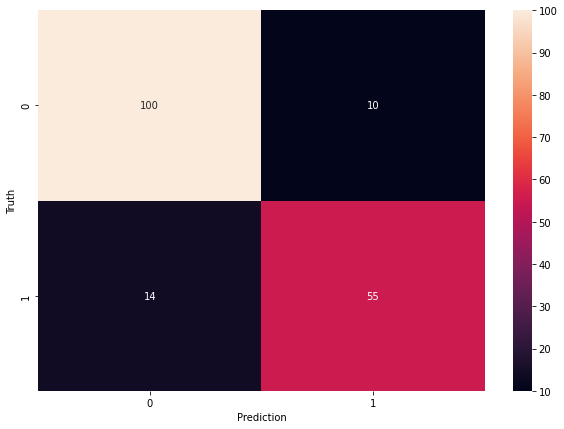

In [30]:
plt.figure(figsize = (10,7), facecolor = 'white')
sns.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

In [31]:
print(sum(sum(cm)))

179
